<a href="https://colab.research.google.com/github/lophiraalata/data-analytics-micro-credential/blob/assignments/IH_Unit4_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project : Diabetes Classification

You will be working on a machine learning project using data from the UCI Machine Learning
Repository.

The dataset is located at:

https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008 (google
UCI Diabetes dataset)

Diabetes 130-US hospitals for years 1999-2008 Data Set

"""The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
 * (1) It is an inpatient encounter (a hospital admission).
 * (2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
 * (3) The length of stay was at least 1 day and at most 14 days.
 * (4) Laboratory tests were performed during the encounter.
 * (5) Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.
"""

In [ ]:
## Analysis by isaiah in collaboration with Jingyue and Hazel 

# 1.0. Problem Statement

#### Your goal is to make a classification model that can be used to predict something within the dataset.

For example, you can choose to predict whether a patient is likely to be a readmit in the
hospital within 30days.

You can choose which features to use in your model (race, gender, age, etc.) and train your model.

Your project should include a description of what you’re trying to accomplish, EDA, data
wrangling, model creation, model evaluations, and model selections.

Your analytics should include at least 2 different types of models (i.e. KNN and Random Forest).

# 2.0. Load the Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.set()
import plotly.express as px
from copy import copy
import tensorflow as tf
from tensorflow import keras
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go

# 3.0. Load the data

In [3]:
!wget https://raw.githubusercontent.com/lophiraalata/ML-Data/main/diabetic_data.csv

--2022-08-06 04:03:15--  https://raw.githubusercontent.com/lophiraalata/ML-Data/main/diabetic_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19159383 (18M) [text/plain]
Saving to: ‘diabetic_data.csv’

diabetic_data.csv   100%[===================>]  18.27M  --.-KB/s    in 0.1s    

2022-08-06 04:03:16 (178 MB/s) - ‘diabetic_data.csv’ saved [19159383/19159383]



In [4]:
diabetes = pd.read_csv('diabetic_data.csv')

# 4.0. Exploratory Data Analysis (EDA)

In [5]:
# Displays first 5 rows of data

diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Notice that the 'weight' column is missing data, represented by '?'
# A reason for this might be that surveyed patients rarely provided weight info when requested
# Our target should be the 'readmitted' column as it can function as a crude indicator of how successful the treatment was
# The 'readmitted' column tells us if a patient was hospitalized within 30 days of discharge, more than 30 days of discharge, or if they were not readmitted
# We can use our ML models to predict the likelihood that a patient will be readmitted

diabetes.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [30]:
# Shows the different types of values in readmitted column

diabetes['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [32]:
# Counts the number of entries for each type of readmission

diabetes.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [15]:
# Brief overview of data: 
# there are over 100,000 individual entries 
# Some of the columns contain identification info, others contain numerical and non-numeric categorical information
# Note that dtypes are objects and integers
# 'age' and 'weight' are categorical instead of numerical

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [14]:
# Shows that weight and age columns contain non-numerical values

diabetes[['weight', 'age']].head(10)

,weight,age
0,?,[0-10)
1,?,[10-20)
2,?,[20-30)
3,?,[30-40)
4,?,[40-50)
5,?,[50-60)
6,?,[60-70)
7,?,[70-80)
8,?,[80-90)
9,?,[90-100)


In [16]:
# There are many features that are unnecessary for our purposes
# These can be removed or replaced later on

diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [33]:
# Brief general desciption of dataset

diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [34]:
# Although there aren't any null values we see a lot of values represented by '?'

diabetes.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

In [35]:
# A significant portion of the data are objects
# Many of these will likely need to be converted to integers to work better with our model

diabetes.dtypes.value_counts()

object    37
int64     13
dtype: int64

In [36]:
# Which other columns have missing data besides 'weight'?
# Because so much data is missing from the 'weight' column, we can drop it
# Large portions of 'payer_code' and 'medical_specialty' are also missing, so we'll drop these too
# The dataset contains 23 features for 23 drugs (or combinationss) which show 
# whether a change in that medication was made or not during the current hospital stay.
# Sources: https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission#Data-Preparation-&-Exploration

for col in diabetes.columns:
    if diabetes[col].dtype == object:
         print(col,diabetes[col][diabetes[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [37]:
# There is also a lot of missing data in the race column

diabetes['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [42]:
# Weight information was not collected or not provided by the vast majority patients

diabetes['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [38]:
# Weight column is split into categories/ranges of 25 lbs

diabetes['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [39]:
# Note the distribution of the ages of patients surveyed

diabetes['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [46]:
# Note that there is a small number of patients for whom gender information does not fall under male or female

diabetes['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

# 5.0. Features

In [ ]:
# Drop weight, payer_code, and medical_specialty columns because of the quantity of missing data

diabetes = diabetes.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [ ]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

In [ ]:
# Change 'readmittance' to integer



In [29]:
diabetes['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [ ]:
# Removing any ? within race
df = df[df['race'] != '?']

# Removing any Unknown/Invalid within gender
df = df[df['gender'] != 'Unknown/Invalid']

In [ ]:
diabetes = diabetes.drop(['admission_source_id', 'diag_1', 'diag_2', 'diag_3', 
                  'max_glu_serum', 'metformin', 'repaglinide', 'nateglinide', 
                  'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
                  'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
                  'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                  'examide', 'citoglipton', 'glyburide-metformin', 
                  'glipizide-metformin', 'glimepiride-pioglitazone', 
                  'metformin-rosiglitazone', 'metformin-pioglitazone', 
                  'diabetesMed'], axis=1)

# 6.0. Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of Readmission')

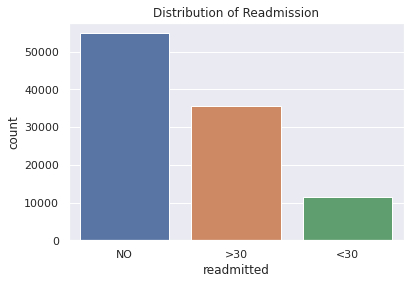

In [13]:
# Visualize the distribution of readmission

sns.countplot(diabetes['readmitted']).set_title('Distribution of Readmission')

In [ ]:
pi chart?

## 6.1. Race

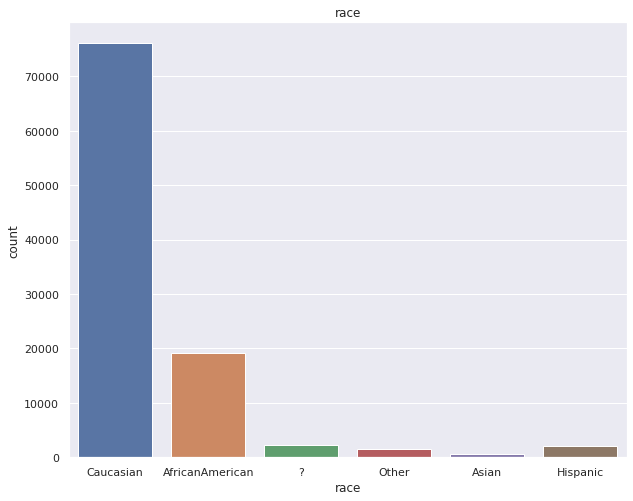

race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64


In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x=diabetes.race, data = diabetes)
plt.title('race')
plt.show()

print('race')
print(diabetes.race.value_counts(normalize = True)*100)

## 6.2 Gender

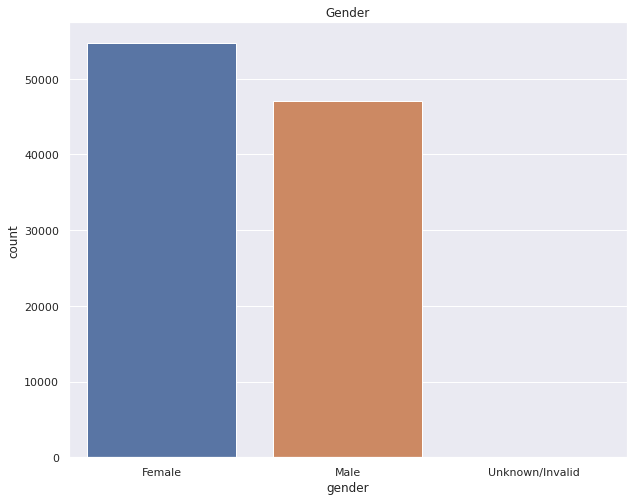

Gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64


In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x=diabetes.gender, data = diabetes)
plt.title('Gender')
plt.show()

print('Gender')
print(diabetes.gender.value_counts(normalize = True)*100)

In [17]:
# sns.pairplot(diabetes,hue='readmitted',palette='coolwarm')

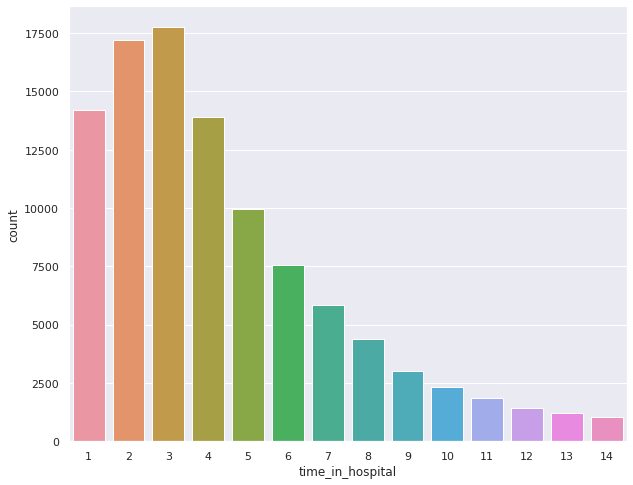

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x=diabetes.time_in_hospital, data = diabetes)

## 6.3. Weight

# 7.0. Perform Train Test Split 

In [ ]:
from sklearn.model_selection import train_test_split

# 8.0. Create ML Models

## 8.1. Linear/Logistic 

## 8.2. KNN

## 8.2. Decision Tree

## 8.3. Random Forest

# 9.0. Make Predictions

# 10.0 Evaluate Models

In [ ]:
print('The Prediction Accuracy of the model is', classifier.score(X_test,y_test))
pp = classifier.predict(X_test)
plist = pp.tolist()
print("predicted # of Setosa:", plist.count('1'))
print("predicted # of Versicolor:", plist.count('2'))
print("predicted # of Virginica:", plist.count('3'))

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
predictions = classifier.predict(X_test)